In [2]:
!pip install yfinance

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use('fivethirtyeight')

In [4]:
end = datetime.now()
start = datetime(end.year - 15, end.month, end.day)
stock = 'BTC-USD'
stock_data = yf.download(stock, start=start,end=end)

/tmp/ipython-input-2858119085.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(stock, start=start,end=end)
[*********************100%***********************]  1 of 1 completed


In [5]:
stock_data.head()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2014-09-17,457.334015,468.174011,452.421997,465.864014,21056800
2014-09-18,424.440002,456.859985,413.104004,456.859985,34483200
2014-09-19,394.795990,427.834991,384.532013,424.102997,37919700
2014-09-20,408.903992,423.295990,389.882996,394.673004,36863600
2014-09-21,398.821014,412.425995,393.181000,408.084991,26580100


In [6]:
stock_data.tail()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2025-08-19,112831.179688,116764.500000,112730.398438,116241.859375,71657600353
2025-08-20,114274.742188,114625.796875,112387.960938,112828.023438,67993811526
2025-08-21,112419.031250,114802.648438,111986.234375,114275.687500,57817883700
2025-08-22,116874.085938,117377.398438,111678.945312,112433.734375,82528088240
2025-08-23,115507.921875,116970.359375,115439.289062,116895.164062,81753448448


In [7]:
stock_data.describe()

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
count,3994.000000,3994.000000,3994.000000,3994.000000,3.994000e+03
mean,24351.865907,24833.595200,23793.915409,24324.195088,2.038541e+10
std,28846.588339,29343.733261,28270.556453,28814.075481,2.174531e+10
min,178.102997,211.731003,171.509995,176.897003,5.914570e+06
25%,2436.822510,2526.467468,2321.189941,2412.122498,9.964988e+08
50%,10217.739746,10406.964355,9922.276367,10202.907227,1.639416e+10
75%,38589.700195,39748.148438,37572.000977,38522.852539,3.176296e+10
max,123344.062500,124457.117188,118959.195312,123339.398438,3.509679e+11


In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3994 entries, 2014-09-17 to 2025-08-23
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3994 non-null   float64
 1   (High, BTC-USD)    3994 non-null   float64
 2   (Low, BTC-USD)     3994 non-null   float64
 3   (Open, BTC-USD)    3994 non-null   float64
 4   (Volume, BTC-USD)  3994 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 187.2 KB


In [10]:
closing_price = stock_data[['Close']]

In [11]:
closing_price

Price,Close
Ticker,BTC-USD
Date,
2014-09-17,457.334015
2014-09-18,424.440002
2014-09-19,394.795990
2014-09-20,408.903992
2014-09-21,398.821014
...,...
2025-08-19,112831.179688
2025-08-20,114274.742188


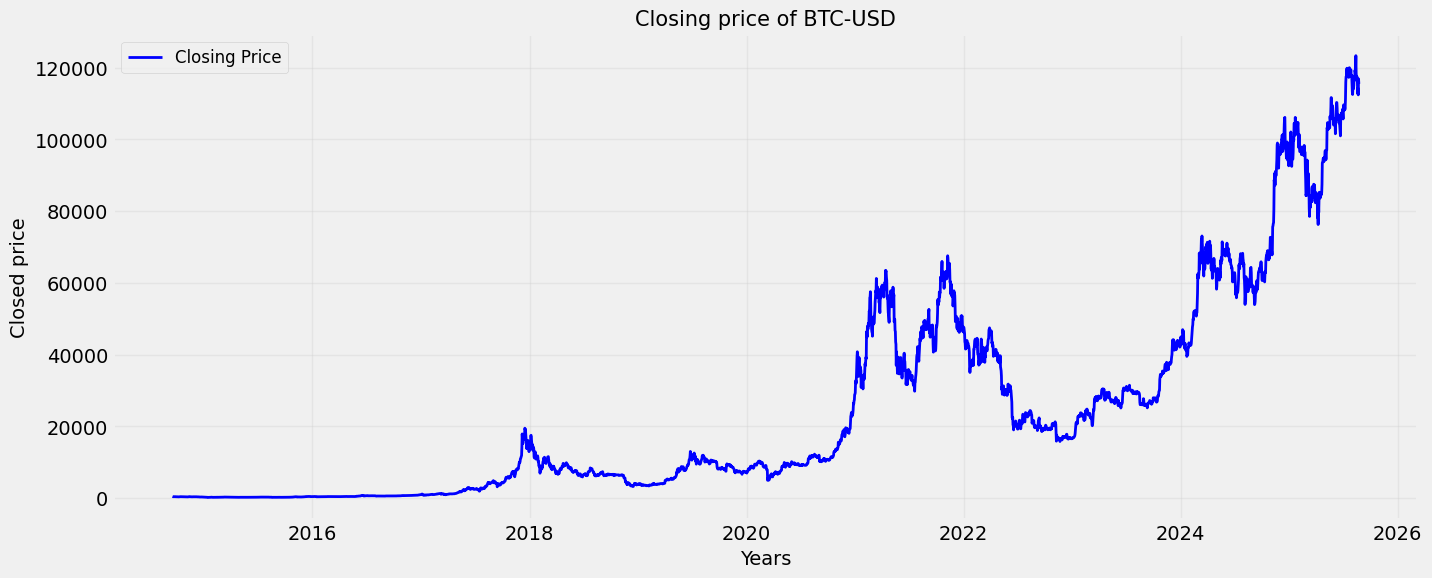

In [12]:
plt.figure(figsize=(15,6))
plt.plot(closing_price.index, closing_price['Close'], label='Closing Price',color='blue',linewidth=2)
plt.title("Closing price of BTC-USD",fontsize=15)
plt.xlabel("Years",fontsize=14)
plt.ylabel("Closed price",fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

In [13]:
for i in range(2014,2024):
  print(i,list(stock_data.index.year).count(i))

2014 106
2015 365
2016 366
2017 365
2018 365
2019 365
2020 366
2021 365
2022 365
2023 365


In [14]:
closing_price['MA_365'] = closing_price['Close'].rolling(window=365).mean()
closing_price['MA_100'] = closing_price['Close'].rolling(window=100).mean()

/tmp/ipython-input-2942381381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_365'] = closing_price['Close'].rolling(window=365).mean()
/tmp/ipython-input-2942381381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  closing_price['MA_100'] = closing_price['Close'].rolling(window=100).mean()


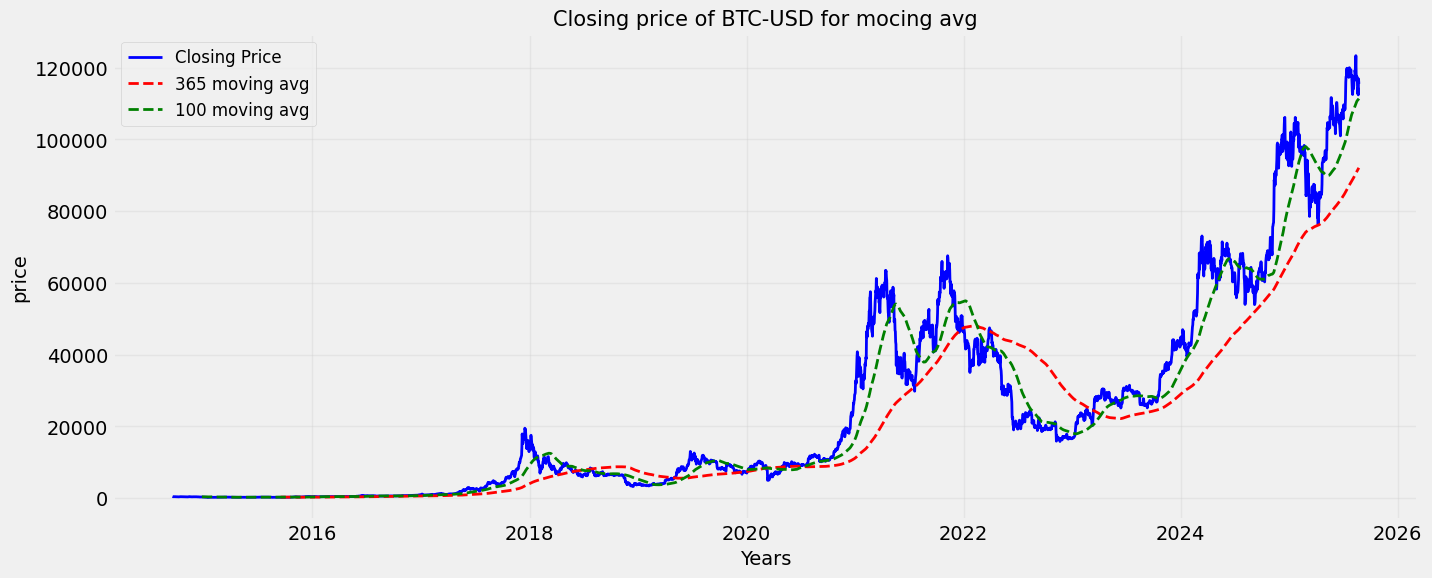

In [16]:
plt.figure(figsize=(15,6))
plt.plot(closing_price.index, closing_price['Close'], label='Closing Price',color='blue',linewidth=2)
plt.plot(closing_price.index, closing_price['MA_365'], label='365 moving avg',color='red',linestyle="--",linewidth=2)
plt.plot(closing_price.index, closing_price['MA_100'], label='100 moving avg',color='green',linestyle="--",linewidth=2)
plt.title("Closing price of BTC-USD for mocing avg",fontsize=15)
plt.xlabel("Years",fontsize=14)
plt.ylabel("price",fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price[['Close']].dropna())

In [18]:
scaled_data

array([[0.00226711],
       [0.00200004],
       [0.00175936],
       ...,
       [0.91129829],
       [0.94746944],
       [0.93637738]])

In [20]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [21]:
base_days = 100
x_data = []
y_data = []
for i in range(base_days,len(scaled_data)):
  x_data.append(scaled_data[i-base_days:i])
  y_data.append(scaled_data[i])
x_data = np.array(x_data)
y_data = np.array(y_data)

In [22]:
train_size = int(len(x_data)*0.9)
x_train, y_train = x_data[:train_size], y_data[:train_size]
x_test, y_test = x_data[train_size:], y_data[train_size:]

In [23]:
model = Sequential([
    LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(64, return_sequences=False),
    Dense(25),
    Dense(1)
])

model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 128)       │        66,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 25)             │         1,625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            26 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,619 (459.45 KB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.fit(x_train,y_train, batch_size=5, epochs=10)

Epoch 1/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 61s 81ms/step - loss: 0.0019
Epoch 2/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 83s 82ms/step - loss: 2.8787e-04
Epoch 3/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 82s 83ms/step - loss: 1.4826e-04
Epoch 4/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 56s 79ms/step - loss: 1.4050e-04
Epoch 5/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - loss: 1.1605e-04
Epoch 6/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - loss: 9.4924e-05
Epoch 7/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - loss: 1.0316e-04
Epoch 8/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 82s 80ms/step - loss: 1.1181e-04
Epoch 9/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 56s 80ms/step - loss: 1.2711e-04
Epoch 10/10
701/701 ━━━━━━━━━━━━━━━━━━━━ 83s 81ms/step - loss: 1.0097e-04


In [25]:
predictions = model.predict(x_test)
inv_predictions = scaler.inverse_transform(predictions)
inv_y_test = scaler.inverse_transform(y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 132ms/step


In [26]:
predictions

array([[0.5282537 ],
       [0.52372986],
       [0.51091754],
       [0.5173791 ],
       [0.48488763],
       [0.47983396],
       [0.45929912],
       [0.42668575],
       [0.44281116],
       [0.43492627],
       [0.48823228],
       [0.48197395],
       [0.48304906],
       [0.46569973],
       [0.47113162],
       [0.48110023],
       [0.46576267],
       [0.4563833 ],
       [0.46695578],
       [0.4713973 ],
       [0.46329266],
       [0.4714491 ],
       [0.46756142],
       [0.48495525],
       [0.47842267],
       [0.50858617],
       [0.5088122 ],
       [0.51006764],
       [0.4982545 ],
       [0.47112268],
       [0.46760672],
       [0.47020537],
       [0.46771777],
       [0.46646205],
       [0.4534071 ],
       [0.46784958],
       [0.45448455],
       [0.45895976],
       [0.44470933],
       [0.42730704],
       [0.42869234],
       [0.43414447],
       [0.45138457],
       [0.45666233],
       [0.45448336],
       [0.46094772],
       [0.48061162],
       [0.475

In [27]:
inv_predictions

array([[ 65240.977],
       [ 64683.797],
       [ 63105.758],
       [ 63901.6  ],
       [ 59899.754],
       [ 59277.312],
       [ 56748.12 ],
       [ 52731.26 ],
       [ 54717.363],
       [ 53746.215],
       [ 60311.7  ],
       [ 59540.887],
       [ 59673.305],
       [ 57536.457],
       [ 58205.48 ],
       [ 59433.273],
       [ 57544.21 ],
       [ 56388.99 ],
       [ 57691.16 ],
       [ 58238.203],
       [ 57239.99 ],
       [ 58244.586],
       [ 57765.754],
       [ 59908.082],
       [ 59103.49 ],
       [ 62818.61 ],
       [ 62846.45 ],
       [ 63001.08 ],
       [ 61546.098],
       [ 58204.38 ],
       [ 57771.332],
       [ 58091.4  ],
       [ 57785.01 ],
       [ 57630.348],
       [ 56022.426],
       [ 57801.246],
       [ 56155.13 ],
       [ 56706.32 ],
       [ 54951.152],
       [ 52807.785],
       [ 52978.406],
       [ 53649.92 ],
       [ 55773.316],
       [ 56423.355],
       [ 56154.98 ],
       [ 56951.17 ],
       [ 59373.094],
       [ 5880

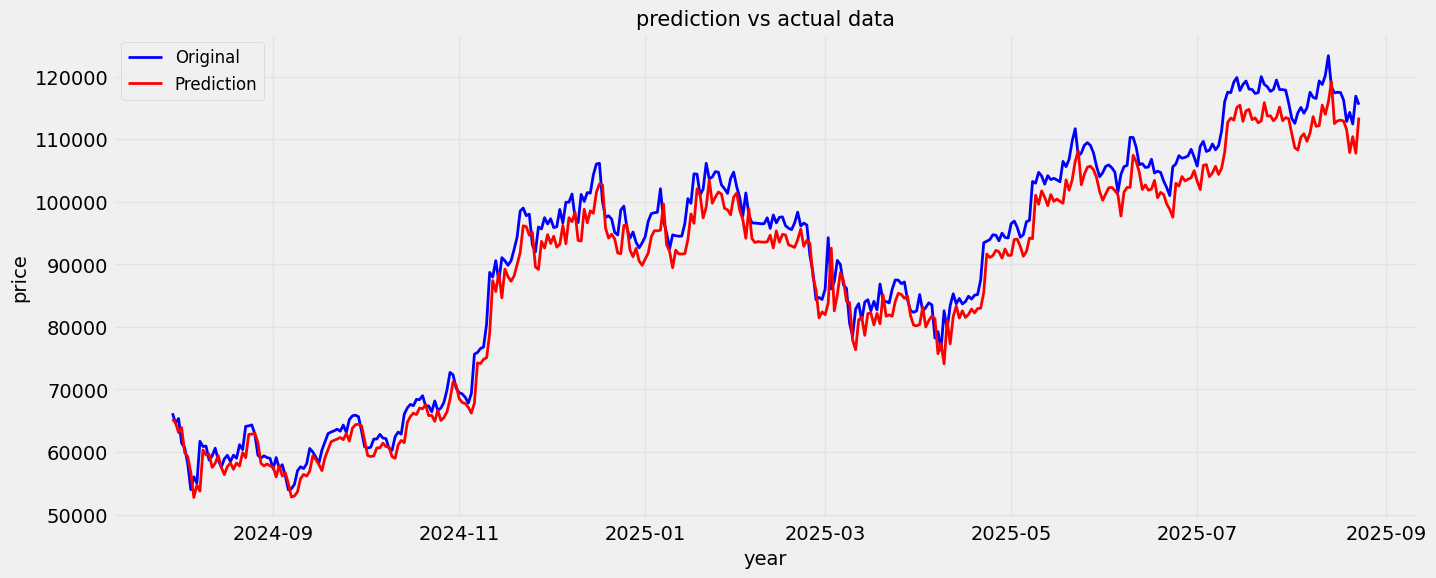

In [28]:
plotting_data = pd.DataFrame(
    {
        'Original': inv_y_test.flatten(),
        'Prediction': inv_predictions.flatten(),
    }, index = closing_price.index[train_size + base_days:]
)

plt.figure(figsize=(15,6))
plt.plot(plotting_data.index, plotting_data['Original'], label='Original',color='blue',linewidth=2)
plt.plot(plotting_data.index, plotting_data['Prediction'], label='Prediction',color='red',linewidth=2)
plt.title("prediction vs actual data",fontsize=15)
plt.xlabel("year",fontsize=14)
plt.ylabel("price",fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

In [29]:
last_100 = scaled_data[-100:].reshape(1, -1, 1)
future_predictions = []

for _ in range(10):
  next_days = model.predict(last_100)
  future_predictions.append(scaler.inverse_transform(next_days))
  last_100 = np.append(last_100[:, 1:, :], next_days.reshape(1, 1, -1), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


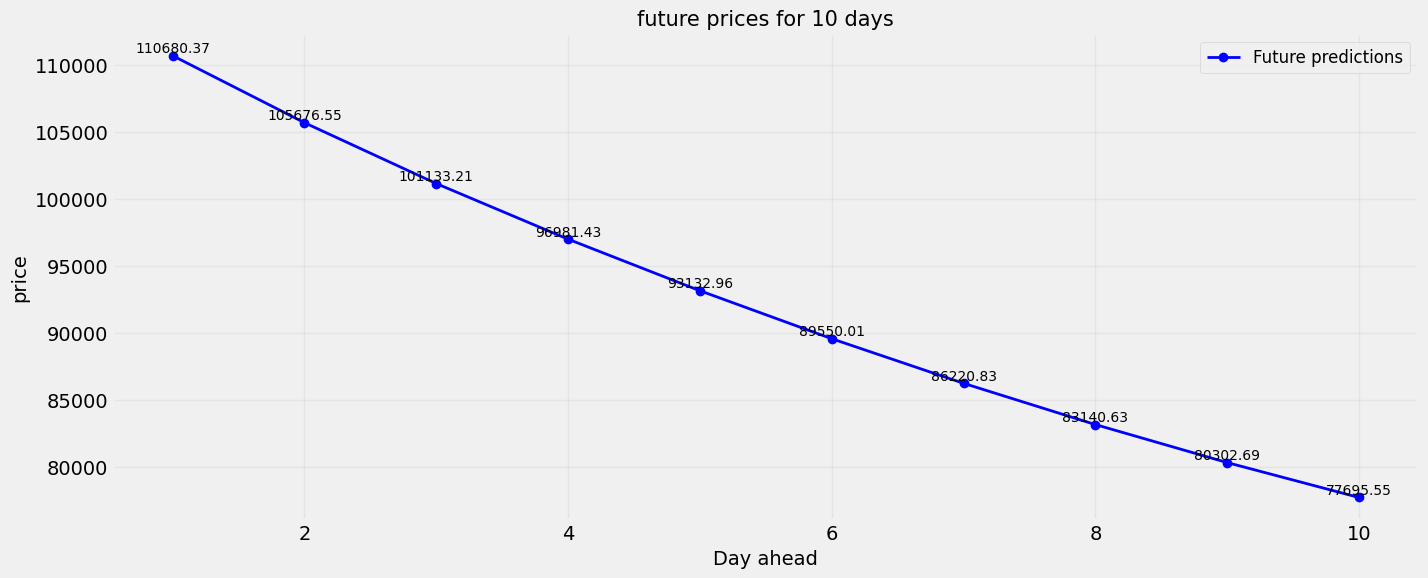

In [31]:
future_predictions = np.array(future_predictions).flatten()

plt.figure(figsize=(15,6))
plt.plot(range(1,11),future_predictions,marker="o", label='Future predictions',color='blue',linewidth=2)

for i, val in enumerate(future_predictions):
  plt.text(i+1,val ,f'{val:.2f}',fontsize = 10, ha='center', va = 'bottom', color='black')

plt.title("future prices for 10 days",fontsize=15)
plt.xlabel("Day ahead",fontsize=14)
plt.ylabel("price",fontsize=14)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

In [33]:
model.save("bitcoin.keras")